In [1]:
"""
IPython Notebook v4.0 para python 2.7
Librerías adicionales: numpy, matplotlib, sklearn
Contenido bajo licencia CC-BY 4.0. Código bajo licencia MIT. (c) Sebastian Flores.
"""

# Configuracion para recargar módulos y librerías 
%reload_ext autoreload
%autoreload 2

%matplotlib inline

from IPython.core.display import HTML

HTML(open("style/mat281.css", "r").read())

<header class="w3-container w3-teal">
<img src="images/utfsm.png" alt="" height="100px" align="left"/>
<img src="images/mat.png" alt="" height="100px" align="right"/>
</header>
<br/><br/><br/><br/><br/>
# MAT281
## Aplicaciones de la Matemática en la Ingeniería
### Sebastián Flores
https://www.github.com/usantamaria/mat281

## Clase anterior

***Regresión Logística***
* ¿Cómo se llamaba el algoritmo que vimos?
* ¿Cuál era la aproximación ingenieril? ¿Machine Learning? ¿Estadística? 
* ¿Cuándo funcionaba y cuándo fallaba?

## ¿Qué veremos hoy?
Clasificación con k-Nearest Neighbors (kNN).

## ¿Porqué veremos ese contenido?

Clasificación con k-Nearest Neighbors (kNN).

* Porque clasificación en múltiples categorías es un problema muy común.
* kNN es el algoritmo más simple que permite clasificar en múltiples categorías y utiliza la noción de distancia/similaridad.

## kNN

Algoritmo **k Nearest Neighbors** es un método no paramétrico: una vez que $k$ se ha fijado, no se busca obtener ningún parámetro.

Sean los puntos $x^{(i)} = (x^{(i)}_1, ..., x^{(i)}_n)$  de etiqueta $y^{(i)}$ conocida, para $i=1, ..., m$.

El problema de clasificación consiste en encontrar la etiqueta de un nuevo punto $x=(x_1, ..., x_m)$ para el cual no conocemos la etiqueta.

## kNN

* Para $k=1$, **1NN** asigna a $x$ la etiqueta de su vecino más cercano. 
* Para $k$ genérico, **kNN** asigna a $x$ la etiqueta más popular de los k vecinos más cercanos. 


El modelo subyacente a kNN es el conjunto de entrenamiento completo. Cuando se necesita realizar una predicción, el algoritmo mira **todos** los datos y selecciona los k datos más similares, para regresar la etiqueta más popular. Los datos no se resumen en un parámetro, como en regresión logística, sino que siempre deben mantenerse en memoria.

<img src="images/1.png" alt="" width="600px" align="middle"/>

<img src="images/2.png" alt="" width="600px" align="middle"/>

<img src="images/3a.png" alt="" width="600px" align="middle"/>

<img src="images/3b.png" alt="" width="600px" align="middle"/>

<img src="images/5a.png" alt="" width="600px" align="middle"/>

<img src="images/5b.png" alt="" width="600px" align="middle"/>

## kNN

En caso de empate, existen diversas maneras de desempatar:
* Elegir la etiqueta del vecino más cercano (problema: no garantiza solución).
* Elegir la etiqueta de menor valor (problema: arbitrario).
* Elegir la etiqueta que se obtendría con $k+1$ o $k-1$ (problema: no garantiza solución, aumenta tiempo de cálculo).

#### kNN
### Medida de similaridad
¿Cómo medimos la cercanía o similaridad entre los datos?

Depende del tipo de datos. 

* Para datos reales, puede utilizarse cualquier distancia, siendo la distancia euclidiana la más utilizada. También es posible ponderar unas componentes más que otras. Resulta conveniente normalizar para poder utilizar la noción de distancia más naturalmente.

* Para datos categóricos o binarios, suele utilizarse la distancia de Hamming.

#### kNN
### Medida de similaridad
La distancia de Hamming entre 2 strings consiste en el número de posiciones en los cuales los strings son distintos.

In [4]:
def hamming(s1, s2):
    # Caso no comparable
    if len(s1)!=len(s2):
        print("No comparable")
        return None
    h = 0
    # Caso comparable
    for ch1, ch2 in zip(s1,s2):
        if ch1!=ch2:
            h+= 1
    # FIX ME
    return h

print hamming("cara", "c") 
print hamming("cara", "casa") 
print hamming("cera", "cese")

No comparable
None
1
2


#### 1. kNN
## Implementación de kNN en python y numpy

Es posible realizar la siguiente implementación en python y numpy

In [8]:
import numpy as np

def knn_search(X, k, x):
    """ find K nearest neighbours of data among D """
    # Distancia euclidiana
    d = np.sqrt(((X - x[:,:k])**2).sum(axis=0))
    # Ordenar por cercania
    idx = np.argsort(d)
    # Regresar los k mas cercanos
    return idx[:k]

def knn(X,Y,k,x):
    # Obtener los k mas cercanos
    k_closest = knn_search(X, k, x)
    # Obtener las etiquetas
    Y_closest = Y[k_closest]
    # Obtener la mas popular
    counts = np.bincount(Y_closest)
    print counts
    # Regresar la mas popular (cualquiera, si hay empate)
    return np.argmax(counts)

#### 1. kNN
## Visualización

[15  5]
etiqueta= 0


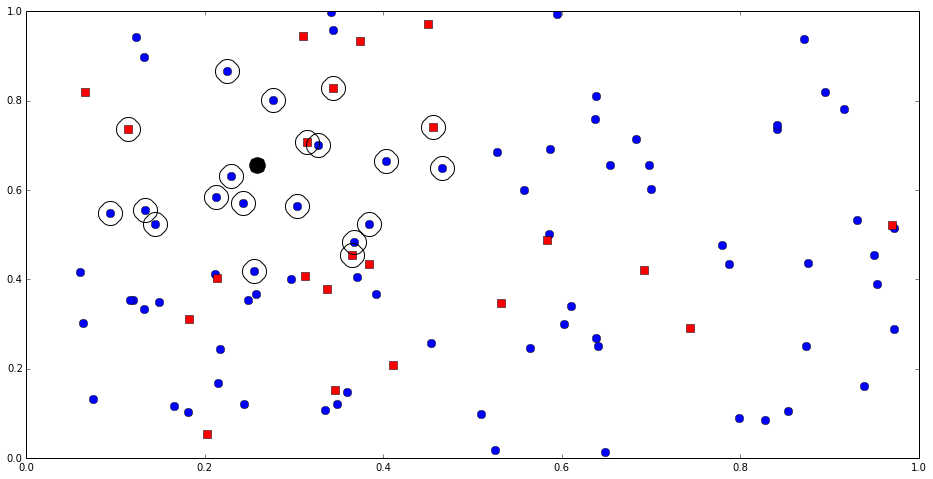

In [13]:
import numpy as np
from matplotlib import pyplot as plt

X = np.random.rand(2,100) # random dataset
Y = np.array(np.random.rand(100)<0.2, dtype=int) # random dataset
x = np.random.rand(2,1) # query point

# performing the search
k = 20
neig_idx = knn_search(X, k, x)
y = knn(X, Y, k, x)
print "etiqueta=", y

# plotting the data and the input point
fig = plt.figure(figsize=(16,8))
plt.plot(X[0,:][Y==0],X[1,:][Y==0],'ob', ms=8)
plt.plot(X[0,:][Y==1],X[1,:][Y==1],'sr', ms=8)
plt.plot(x[0,0],x[1,0],'ok', ms=16)

# highlighting the neighbours
plt.plot(X[0,neig_idx], X[1,neig_idx], 'o', markerfacecolor='None', markersize=24, markeredgewidth=1)
plt.show()

## 2. Aplicación al Iris Dataset

Aplicaremos $kNN$ en las $3$ clases conocidas. 

<img src="images/iris_petal_sepal.png" alt="" width="300px" align="middle"/>


¿Qué valor de $k$ es razonable tomar?

In [15]:
import numpy as np
from sklearn import datasets

# Loading the data
iris = datasets.load_iris()
X = iris.data
Y = iris.target
print iris.target_names

print X.shape[0]

# Print data and labels
for x, y in zip(X,Y):
    print x, y
    


['setosa' 'versicolor' 'virginica']
150
[ 5.1  3.5  1.4  0.2] 0
[ 4.9  3.   1.4  0.2] 0
[ 4.7  3.2  1.3  0.2] 0
[ 4.6  3.1  1.5  0.2] 0
[ 5.   3.6  1.4  0.2] 0
[ 5.4  3.9  1.7  0.4] 0
[ 4.6  3.4  1.4  0.3] 0
[ 5.   3.4  1.5  0.2] 0
[ 4.4  2.9  1.4  0.2] 0
[ 4.9  3.1  1.5  0.1] 0
[ 5.4  3.7  1.5  0.2] 0
[ 4.8  3.4  1.6  0.2] 0
[ 4.8  3.   1.4  0.1] 0
[ 4.3  3.   1.1  0.1] 0
[ 5.8  4.   1.2  0.2] 0
[ 5.7  4.4  1.5  0.4] 0
[ 5.4  3.9  1.3  0.4] 0
[ 5.1  3.5  1.4  0.3] 0
[ 5.7  3.8  1.7  0.3] 0
[ 5.1  3.8  1.5  0.3] 0
[ 5.4  3.4  1.7  0.2] 0
[ 5.1  3.7  1.5  0.4] 0
[ 4.6  3.6  1.   0.2] 0
[ 5.1  3.3  1.7  0.5] 0
[ 4.8  3.4  1.9  0.2] 0
[ 5.   3.   1.6  0.2] 0
[ 5.   3.4  1.6  0.4] 0
[ 5.2  3.5  1.5  0.2] 0
[ 5.2  3.4  1.4  0.2] 0
[ 4.7  3.2  1.6  0.2] 0
[ 4.8  3.1  1.6  0.2] 0
[ 5.4  3.4  1.5  0.4] 0
[ 5.2  4.1  1.5  0.1] 0
[ 5.5  4.2  1.4  0.2] 0
[ 4.9  3.1  1.5  0.1] 0
[ 5.   3.2  1.2  0.2] 0
[ 5.5  3.5  1.3  0.2] 0
[ 4.9  3.1  1.5  0.1] 0
[ 4.4  3.   1.3  0.2] 0
[ 5.1  3.4  1.5  0.2] 0


## 2.  Aplicación al Iris Dataset

Para aplicar el k Nearest Neighbors, utilizando el algoritmo [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) de la librería sklearn, requerimos un código como el siguiente:

In [19]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Meta parameter
k = 150

# Loading the data
iris = datasets.load_iris()
names = iris.target_names
X = iris.data
Y = iris.target

# Fitting the model
kNN = KNeighborsClassifier(k)
kNN.fit(X,Y)

# No coefficients to print!

# Predicting values
Y_pred = kNN.predict(X)

# Count the errors
template = "{0} errores de clasificación de un total de {1}"
print template.format(sum(Y!=Y_pred), len(Y))

# Matriz de confusion
print confusion_matrix(Y, Y_pred)

5 errores de clasificación de un total de 150
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


## 2.  Aplicación al Iris Dataset

¡Wow! ¡El método es perfecto para k=1!

¿o no?

kNN por construcción asigna la etiqueta del vecino más cercano, por lo que el error de entrenamiento para k=1 siempre será 0.

## 2.  Aplicación al Iris Dataset

Para aplicar el k Nearest Neighbors, utilizando el algoritmo [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) de la librería sklearn, requerimos utilizar un **Holdout SET** para evaluar el error de predicción:

In [33]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

# Meta parameter
k = 5

# Loading the data
iris = datasets.load_iris()
names = iris.target_names
X = iris.data
Y = np.array(iris.target, int)

# Holdout Set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.6)
print X_train.shape, X_test.shape

# Fitting the model
kNN = KNeighborsClassifier(n_neighbors=k)
kNN.fit(X_train, Y_train)

# No coefficients to print!

# Predicting values
Y_test_pred = kNN.predict(X_test)

# Count the errors
n_errors = sum(Y_test!=Y_test_pred)
template = "{0} errores de clasificación de un total de {1}"
print template.format(n_errors, len(Y_test))

# Matriz de confusion
print confusion_matrix(Y_test, Y_test_pred)

(90, 4) (60, 4)
2 errores de clasificación de un total de 60
[[20  0  0]
 [ 0 20  0]
 [ 0  2 18]]


## 2. Aplicación al Iris Dataset

Debido al problema del overfitting, para seleccionar $k$ estamos obligados a utilizar un holdout set. 

De hecho, debemos utilizar 3 conjuntos de datos:
* Conjunto de Entrenamiento (Training Dataset).
* Conjunto de Validación (Validation Dataset).
* Conjunto de Testeo (Testing Dataset).

## 2. Aplicación al Iris Dataset

* **Training set**: Conjunto de ejemplos utililizados para "aprender": ajustar los parámetros de un modelo elegido.

* **Validation set**: Conjunto de ejemplos utilizado para afinar los metaparámetros de un clasificador. En kNN, por ejemplo, para saber que valor de $k$ tomar.

* **Test set**: conjunto de ejemplos completamente nuevo, y que se utiliza para conocer el error de predicción de un modelo completamente entrenado. 

## 2. Aplicación al Iris Dataset
¿Porqué es necesario separar test y validación? Porque no queremos que el error de predicción contenga sesgo de ningún tipo.

In [34]:
from sklearn.cross_validation import train_test_split
from sklearn import datasets
import numpy as np

# Loading the data
iris = datasets.load_iris()
names = iris.target_names

X = iris.data
Y = np.array(iris.target, int)

# Splitting the data
X_train, X_aux, Y_train, Y_aux = train_test_split(X, Y, train_size=0.6)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_aux, Y_aux, test_size=0.5)
print X_train.shape
print X_valid.shape
print X_test.shape

(90, 4)
(30, 4)
(30, 4)


## 2.  Aplicación al Iris Dataset

Para aplicar el k Nearest Neighbors, con conjuntos de entrenamiento, validación y testeo, y utilizando el algoritmo [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) de la librería sklearn, requerimos un código como el siguiente:

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

# Loading the data
iris = datasets.load_iris()
names = iris.target_names
X = iris.data
Y = np.array(iris.target, int)

# Holdout Set
X_aux, X_aux, Y_train, Y_aux = train_test_split(X, Y, train_size=0.6)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_aux, Y_aux, test_size=0.5)

template = "k={0}: {1} errores de clasificación de un total de {2}"
# Fitting the model
for k in range(1,21):
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train, Y_train)

    # Predicting values
    Y_test_pred = kNN.predict(X_test)

    # Count the errors
    n_errors = sum(Y_test!=Y_test_pred)
    print template.format(k, n_errors, len(Y_test))

## 2.  Aplicación al Iris Dataset

Para aplicar el k Nearest Neighbors, con conjuntos de entrenamiento, validación y testeo, y utilizando el algoritmo [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) de la librería sklearn, requerimos un código como el siguiente:

In [38]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

# Loading the data
iris = datasets.load_iris()
names = iris.target_names
X = iris.data
Y = np.array(iris.target, int)

# Holdout Set
X_tv, X_test, Y_tv, Y_test = train_test_split(X, Y, train_size=0.8)

template = "k={0}: {1} errores de clasificación de un total de {2}"
# Fitting the model
mean_error_for_k = []
for k in range(1,21):
    errors_k = []
    for i in range(1000):
        kNN = KNeighborsClassifier(n_neighbors=k)
        X_train, X_valid, Y_train, Y_valid = train_test_split(X_tv, Y_tv, train_size=0.75)
        kNN.fit(X_train, Y_train)
        # Predicting values
        Y_valid_pred = kNN.predict(X_valid)
        # Count the errors
        n_errors = sum(Y_valid!=Y_valid_pred)
        # Add them to vector
        errors_k.append(n_errors)
    errors = np.array(errors_k).mean()
    print template.format(k, errors, len(Y_valid))
    mean_error_for_k.append(errors)

k=1: 1.344 errores de clasificación de un total de 30
k=2: 1.745 errores de clasificación de un total de 30
k=3: 1.149 errores de clasificación de un total de 30
k=4: 1.433 errores de clasificación de un total de 30
k=5: 1.346 errores de clasificación de un total de 30
k=6: 1.508 errores de clasificación de un total de 30
k=7: 1.4 errores de clasificación de un total de 30
k=8: 1.556 errores de clasificación de un total de 30
k=9: 1.399 errores de clasificación de un total de 30
k=10: 1.518 errores de clasificación de un total de 30
k=11: 1.443 errores de clasificación de un total de 30
k=12: 1.691 errores de clasificación de un total de 30
k=13: 1.588 errores de clasificación de un total de 30
k=14: 1.805 errores de clasificación de un total de 30
k=15: 1.744 errores de clasificación de un total de 30
k=16: 1.859 errores de clasificación de un total de 30
k=17: 1.907 errores de clasificación de un total de 30
k=18: 2.043 errores de clasificación de un total de 30
k=19: 1.94 errores de

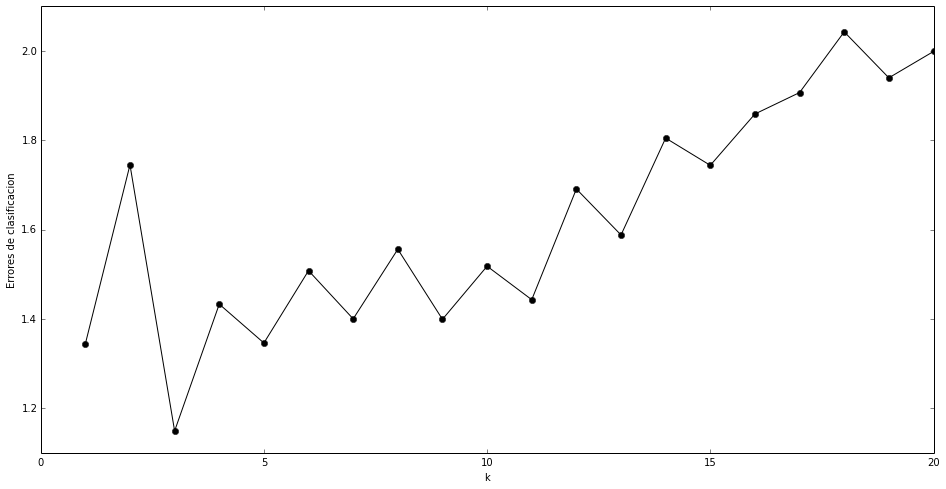

In [39]:
from matplotlib import pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(range(1,21), mean_error_for_k, '-ok')
plt.xlabel("k")
plt.ylabel("Errores de clasificacion")
plt.show()

## 2.  Aplicación al Iris Dataset

Debido a lo anterior, resulta razonable considerar $k=3$ ó $k=5$, con un error de predicción de $1/30$, es decir, de aproximadamente $0.0333$.

In [46]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Meta parameter
k = 5

# Loading the data
iris = datasets.load_iris()
names = iris.target_names
X = iris.data
Y = np.array(iris.target, int)

# Holdout Set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.6)
print X_train.shape, X_test.shape

# Fitting the model
kNN = KNeighborsClassifier(n_neighbors=k)
kNN.fit(X_train, Y_train)

# No coefficients to print!

# Predicting values
Y_test_pred = kNN.predict(X_test)

# Count the errors
n_errors = sum(Y_test!=Y_test_pred)
print "{0} errores de clasificación de un total de {1}".format(n_errors, len(Y_test))
print n_errors/float(len(Y_test))

# Matriz de confusion
print confusion_matrix(Y_test, Y_test_pred)

(90, 4) (60, 4)
3 errores de clasificación de un total de 60
0.05
[[12  0  0]
 [ 0 20  2]
 [ 0  1 25]]


## Referencias

* Jake VanderPlas, ESAC Data Analysis and Statistics Workshop 2014, https://github.com/jakevdp/ESAC-stats-2014
* http://glowingpython.blogspot.cl/2012/04/k-nearest-neighbor-search.html
* http://blog.yhathq.com/posts/classification-using-knn-and-python.html
* Andrew Ng, Machine Learning CS144, Stanford University.